<div style="font-size: 40px;">
    Student Performance Indicator
</div>


<div style="font-size: 25px;">
    Machine Learning Project Lifecycle:
</div>

***Student Performance Indicator***


* Understand the Problem Statement
* Collect Data
* Perform Data Checks
* Conduct Exploratory Data Analysis (EDA)
* Preprocess Data
* Train the Model
* Select the Best Model

1)  **Problem Statement**

* Understanding how various factors like gender, ethnicity, parental level of education, lunch, and test preparation course affect student performance (test scores)

2. **Data Collection**

* Dataset Source: Kaggle link provided.
* The dataset consists of 8 columns and 1000 rows.

2.1 **Import Data and Required Packages**

importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

2.2 **Dataset Information:**

* Gender: Sex of students (Male/Female)
* Race/Ethnicity: Ethnicity of students (Group A, B, C, D, E)
* Parental Level of Education: Parent's final education level (Bachelor's degree, some college, Master's degree, * Associate's degree, high school)
* Lunch: Whether students have lunch before the test (Standard or Free/Reduced)
* Test Preparation Course: Whether students completed a test preparation course before the test (Complete or Not Complete)
* Math Score: Student's score in mathematics
* Reading Score: Student's score in reading
* Writing Score: Student's score in writing

3. **Data Checks to Perform:**

* Check Missing Values
* Check Duplicates
* Check Data Type
* Check the Number of Unique Values of Each Column
* Check Statistics of the Dataset
* Check Various Categories Present in the Different Categorical Columns

<div style="font-size: 25px;">
    uploading all the models and libraies 
</div>

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
# 📌 Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# XGBoost Classifier
from xgboost import XGBClassifier

# 📌 Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor

# XGBoost Regressor
from xgboost import XGBRegressor

from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, r2_score, mean_absolute_error
)

# Ensure Matplotlib inline mode
%matplotlib inline

In [288]:
df = pd.read_csv("C:\\ALL_FROM_DESKTOP\\Machine_Learning\\End To End Project with Deployment\\notebook\\data\\data.csv")

In [289]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Statistical analysis

In [290]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [291]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

<Axes: >

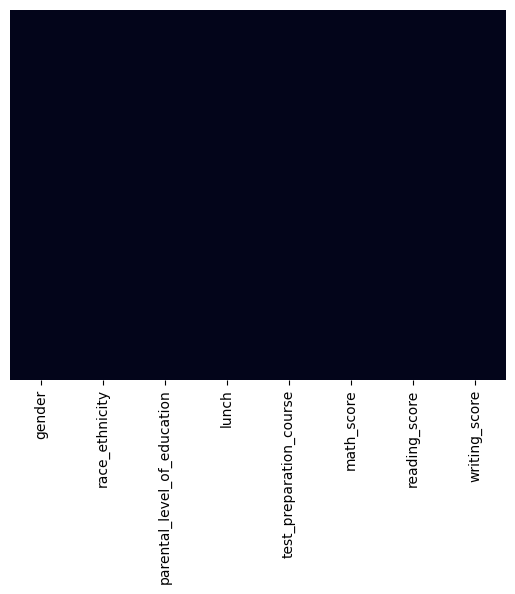

In [292]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [294]:
df.duplicated().sum()

np.int64(0)

In [295]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [296]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Categorical Features Visualization (Bar Plots)


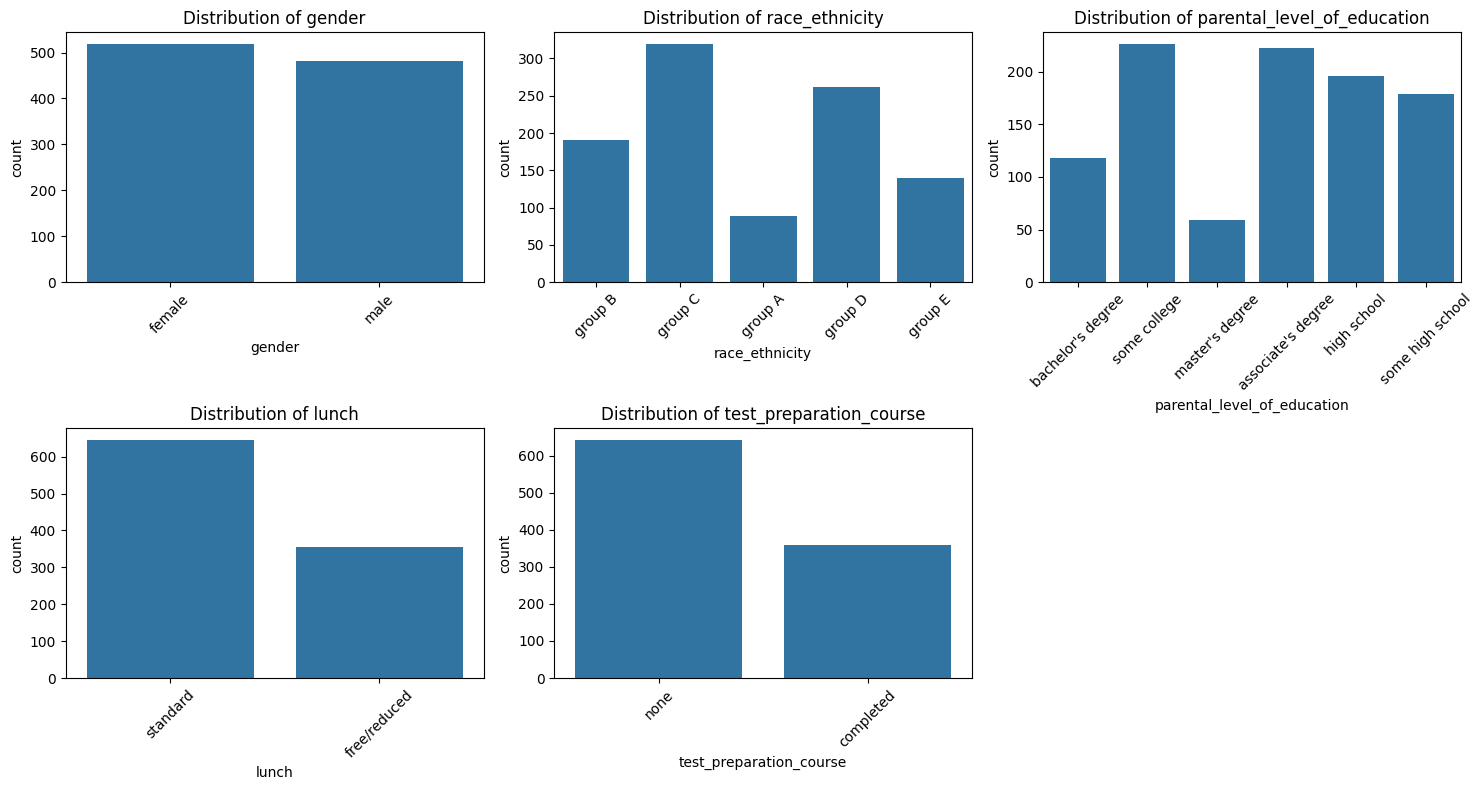

In [297]:
# Bar plot for each categorical column
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

plt.figure(figsize=(15, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Stacked Bar Plot (gender vs test_preparation_course)

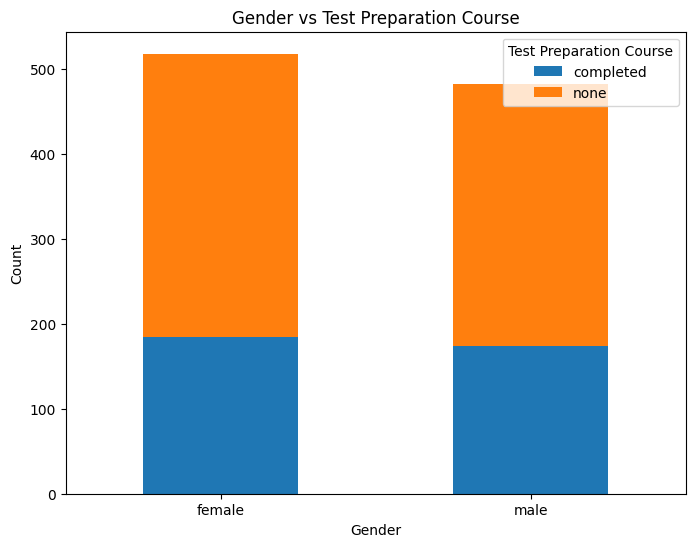

In [298]:
# Stacked Bar Plot
contingency_table = pd.crosstab(df['gender'], df['test_preparation_course'])
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Gender vs Test Preparation Course')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Test Preparation Course')
plt.show()


# Numerical Features Visualization (Histograms)

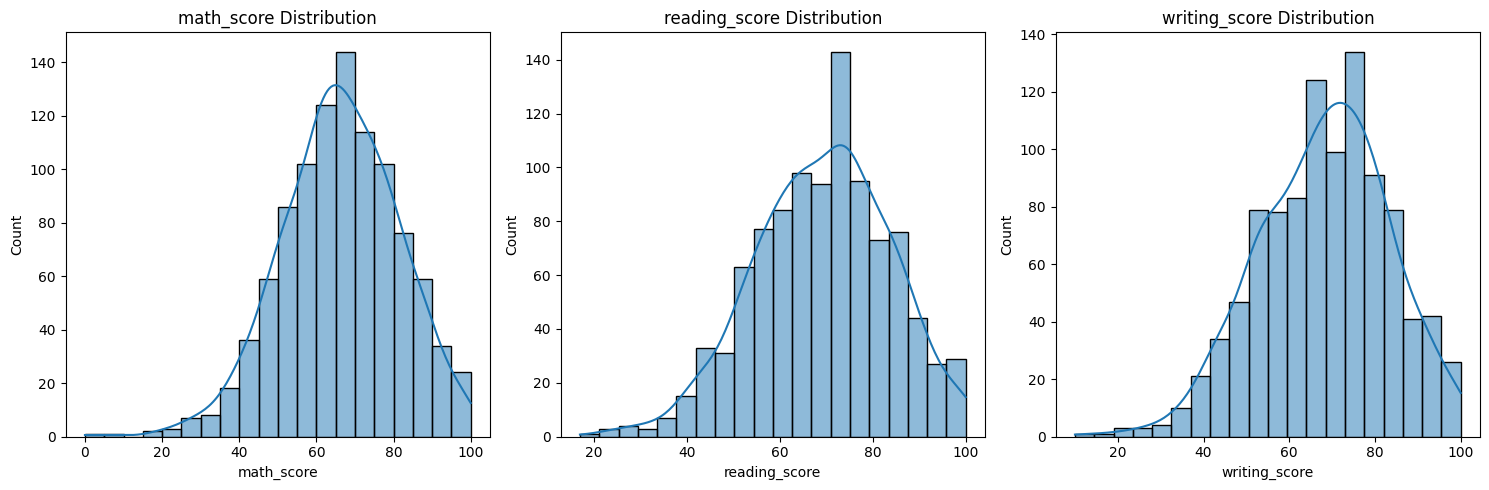

In [299]:
# Histograms for math_score, reading_score, and writing_score
numerical_columns = ['math_score', 'reading_score', 'writing_score']

plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()


# Box Plots for Numerical Features

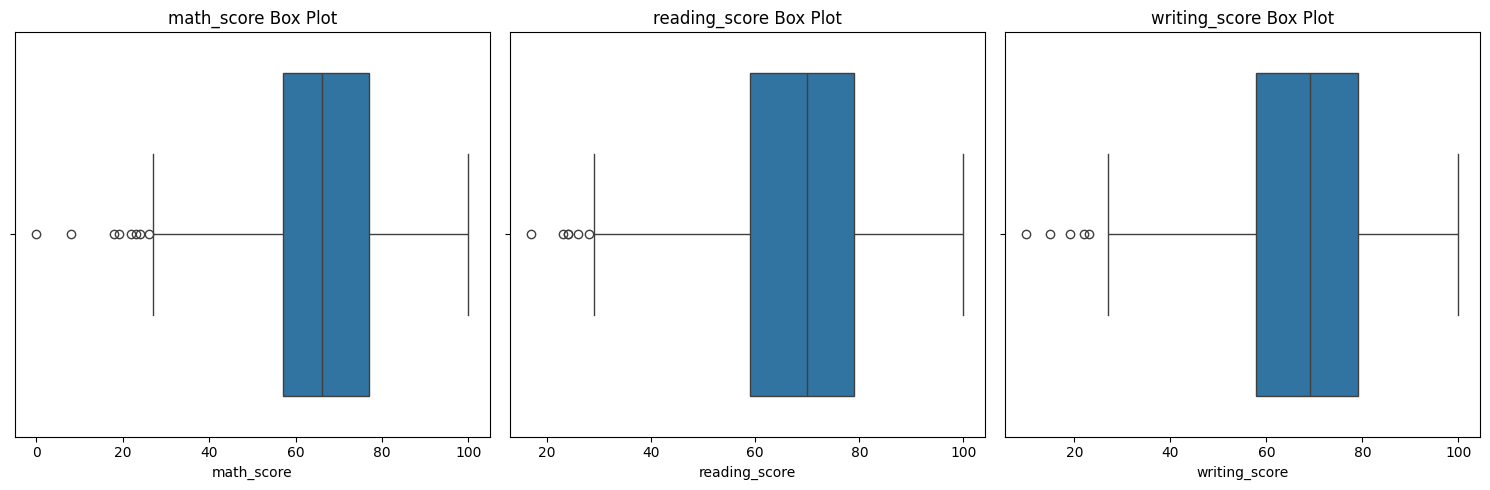

In [300]:
# Box plots for numerical columns
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()


# Correlation Heatmap

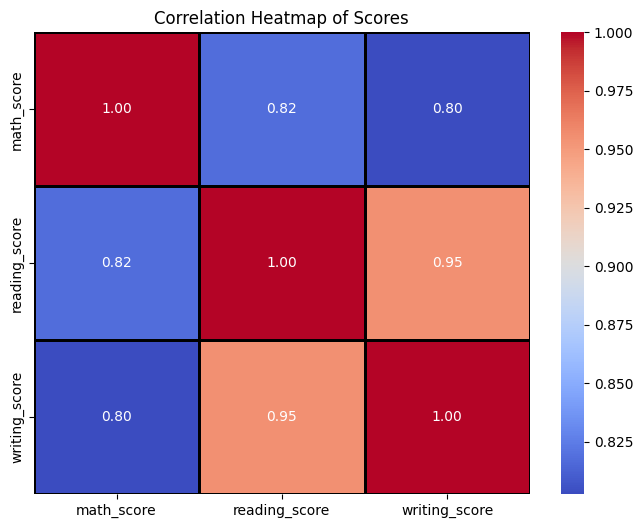

In [301]:
# Correlation heatmap for numerical columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap of Scores')
plt.show()


# Pair Plot

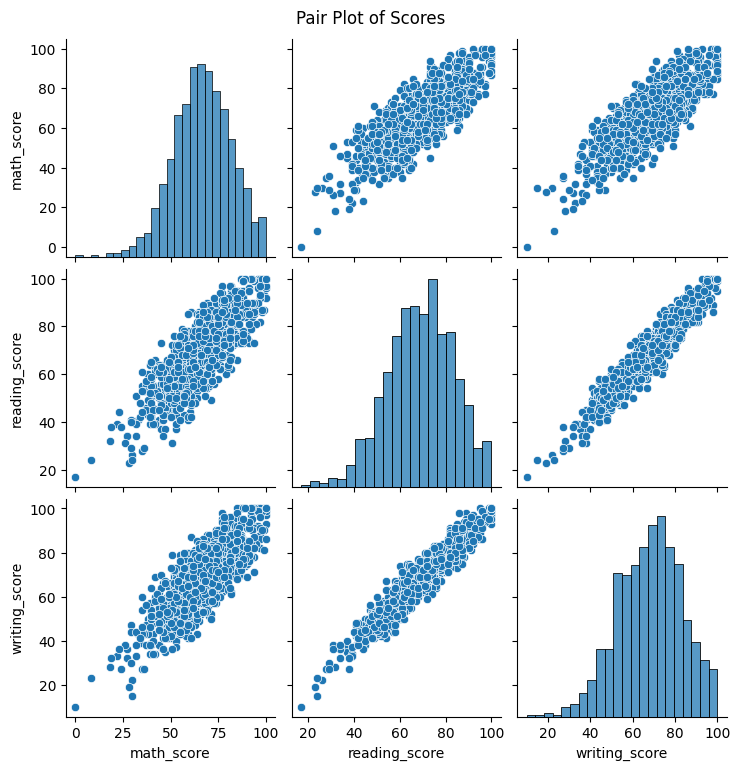

In [302]:
# Pair plot to explore relationships between numerical features
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Scores', y=1.02)
plt.show()


## Converting Categorical Features to Dummy Variables

In [303]:
df_dummies = pd.get_dummies(df, drop_first=True)  # drop_first=True removes the first category to avoid multicollinearity

In [304]:
df = df_dummies

In [305]:
df.head()

,math_score,reading_score,writing_score,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math_score                                     1000 non-null   int64
 1   reading_score                                  1000 non-null   int64
 2   writing_score                                  1000 non-null   int64
 3   gender_male                                    1000 non-null   bool 
 4   race_ethnicity_group B                         1000 non-null   bool 
 5   race_ethnicity_group C                         1000 non-null   bool 
 6   race_ethnicity_group D                         1000 non-null   bool 
 7   race_ethnicity_group E                         1000 non-null   bool 
 8   parental_level_of_education_bachelor's degree  1000 non-null   bool 
 9   parental_level_of_education_high school        1000 non-null   bool 
 10  p

In [307]:
# Drop the columns 'math_score', 'reading_score', and 'writing_score' to create the feature set X
x = df.drop(['math_score', 'reading_score', 'writing_score'], axis=1)

# Assign the target variables to y
y = df[['math_score', 'reading_score', 'writing_score']]
#y = df['math_score']

In [308]:
x.head()

,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True


In [309]:
y.head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [310]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [311]:
# Dictionary to store best parameters
best_params = {}

# List of models 
models = {
    # 📌 Regression Models
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),  
    "Lasso": Lasso(),   
    "ElasticNet": ElasticNet(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),

    # 📌 Classification Models
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "Support Vector Classifier (SVC)": SVC(),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "Naive Bayes (GaussianNB)": GaussianNB()
}

In [312]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
import numpy as np
import pandas as pd

# Choose the problem type: "classification" or "regression"
problem_type = "regression"  # Change this to "classification" if needed

# Explicitly define classification and regression models as sets
classification_models = {
    "Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", 
    "Gradient Boosting Classifier", "AdaBoost Classifier", "XGBoost Classifier",
    "Support Vector Classifier (SVC)", "K-Nearest Neighbors Classifier", "Naive Bayes (GaussianNB)"
}

regression_models = {
    "Linear Regression", "Ridge", "Lasso", "ElasticNet",
    "Decision Tree Regressor", "Random Forest Regressor", 
    "Gradient Boosting Regressor", "AdaBoost Regressor", "XGBoost Regressor",
    "Support Vector Regressor (SVR)", "K-Nearest Neighbors Regressor"
}

# 🔥 ✅ Filter models before training
selected_models = {}
if problem_type == "classification":
    selected_models = {name: model for name, model in models.items() if name in classification_models}
elif problem_type == "regression":
    selected_models = {name: model for name, model in models.items() if name in regression_models}

# 🔥 ✅ Print models actually being used
print(f"Selected problem type: {problem_type}")
print(f"Models being trained: {list(selected_models.keys())}")

# Initialize lists to store the results for the table
model_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

# Check if y_train is multi-dimensional (i.e., has more than one target column)
is_multivariable = len(y_train.shape) > 1 and y_train.shape[1] > 1

# 🔥 ✅ Now train only the filtered models
for name, model in selected_models.items():
    print(f"Training {name}...")

    # Handle multivariable situations
    if is_multivariable and problem_type == "classification":
        print("Can't perform multi-output classification.")
    elif problem_type == "regression" and is_multivariable:
        print("Using MultiOutputRegressor for multi-output regression...")
        model = MultiOutputRegressor(model)
    
    # Train the model
    model.fit(X_train, y_train)

    if problem_type == "classification":
        # Classification models: Use classification metrics
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        train_precision = precision_score(y_train, y_train_pred, average='weighted')
        train_recall = recall_score(y_train, y_train_pred, average='weighted')

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')

        # Compute ROC AUC only if model supports probability predictions
        if hasattr(model, "predict_proba"):
            if len(np.unique(y_train)) > 2:  # Multiclass classification
                y_train_prob = model.predict_proba(X_train)
                y_test_prob = model.predict_proba(X_test)
                train_roc_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr', average='weighted')
                test_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr', average='weighted')
            else:  # Binary classification
                train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
                test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        else:
            train_roc_auc, test_roc_auc = None, None

        print(f"\nModel: {name}")
        print(f"Training Set Performance: Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, ROC AUC: {train_roc_auc if train_roc_auc else 'N/A'}")
        print(f"Test Set Performance: Accuracy: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, ROC AUC: {test_roc_auc if test_roc_auc else 'N/A'}")

    else:
        # Regression models: Use regression metrics
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)

        model_list.append(name)
        mse_list.append(test_mse)
        mae_list.append(test_mae)
        rmse_list.append(test_rmse)
        r2_list.append(test_r2)

        print(f"\nModel: {name}")
        print(f"Training Set Performance: RMSE: {train_rmse:.4f}")
        print(f"Test Set Performance: RMSE: {test_rmse:.4f}")

    print("-" * 50)

# Create a DataFrame with the results
results_df = pd.DataFrame(list(zip(model_list, mae_list, mse_list, rmse_list, r2_list)),
                          columns=['Model Name', 'MAE', 'MSE', 'RMSE', 'R2_Score'])

# Sort by R2 Score (descending)
results_df = results_df.sort_values(by="R2_Score", ascending=False)

# Display the results
print(results_df)


Selected problem type: regression
Models being trained: ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'AdaBoost Regressor', 'XGBoost Regressor', 'Support Vector Regressor (SVR)', 'K-Nearest Neighbors Regressor']
Training Linear Regression...
Using MultiOutputRegressor for multi-output regression...

Model: Linear Regression
Training Set Performance: RMSE: 12.5655
Test Set Performance: RMSE: 13.7620
--------------------------------------------------
Training Ridge...
Using MultiOutputRegressor for multi-output regression...

Model: Ridge
Training Set Performance: RMSE: 12.5657
Test Set Performance: RMSE: 13.7672
--------------------------------------------------
Training Lasso...
Using MultiOutputRegressor for multi-output regression...

Model: Lasso
Training Set Performance: RMSE: 13.5546
Test Set Performance: RMSE: 14.5747
--------------------------------------------------
Training ElasticNet.

In [313]:
# Create a DataFrame with the results
results_df = pd.DataFrame(list(zip(model_list, mae_list, mse_list, rmse_list, r2_list)),
                          columns=['Model Name', 'MAE', 'MSE', 'RMSE', 'R2_Score'])

# Sort by R2 Score (descending)
results_df = results_df.sort_values(by="R2_Score", ascending=False)
results_df

,Model Name,MAE,MSE,RMSE,R2_Score
0,Linear Regression,10.764435,189.392836,13.762007,0.199711
1,Ridge,10.770262,189.535438,13.767187,0.199111
9,Support Vector Regressor (SVR),11.111322,200.870030,14.172862,0.151454
7,AdaBoost Regressor,11.170599,205.023595,14.318645,0.134152
6,Gradient Boosting Regressor,11.142142,205.701172,14.342286,0.130911
2,Lasso,11.409434,212.421946,14.574702,0.102783
3,ElasticNet,11.712222,222.378489,14.912360,0.060906
10,K-Nearest Neighbors Regressor,11.961000,229.746867,15.157403,0.029610
5,Random Forest Regressor,11.860412,232.698155,15.254447,0.016795
8,XGBoost Regressor,11.987495,236.381653,15.374708,0.001430


# Overall Interpretation:
* **Best Models:**

 -> Linear Regression and Ridge are the most consistent performers with a relatively low RMSE on both the training and test sets.
Gradient Boosting and AdaBoost also perform well with a reasonable generalization from training to test sets.

* **Overfitting Models:**

 -> Decision Tree, Random Forest, XGBoost, and KNN show a significant difference between training and test RMSE, indicating overfitting. These models perform very well on the training data but do not generalize well on unseen data.

* **Underperforming Models:**

 -> Lasso and ElasticNet seem to perform worse, especially on the test set, possibly due to too much regularization leading to underfitting.

In [314]:
# Fixed Hyperparameter Grids

#-----------------Classifier------------------------------
"""
hyperparameter_grids = {
    "Logistic Regression": {
    "penalty": ["l1", "l2", "elasticnet", None],  
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "saga"],  # Optimizers
    "max_iter": [100, 200, 500]
},

"Decision Tree Classifier": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"],  # ✅ Classification uses "gini" or "entropy"
    },

"Random Forest Classifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"],  # ✅ Classification uses "gini" or "entropy"
    },

"Gradient Boosting Classifier": {
    "n_estimators": [50, 100, 200, 500],  
    "learning_rate": [0.01, 0.1, 0.2, 0.5],  
    "max_depth": [3, 5, 10],  
    "subsample": [0.8, 1.0],  
    "random_state": [42]
},

"XGBoost Classifier": {
    "n_estimators": [50, 100, 200, 500],  
    "learning_rate": [0.01, 0.1, 0.2, 0.5],  
    "max_depth": [3, 5, 10],  
    "subsample": [0.8, 1.0],  
    "colsample_bytree": [0.8, 1.0],  
    "gamma": [0, 0.1, 0.3],  
    "random_state": [42]
},

"AdaBoost Classifier": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1, 10],
        "estimator": [DecisionTreeClassifier(max_depth=3), None],  # ✅ Use "estimator" instead of "base_estimator"
    },

"Support Vector Classifier (SVC)": {
    "C": [0.1, 1, 10, 100],  # Regularization
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  
    "gamma": ["scale", "auto"],  # Kernel coefficient
    "degree": [3, 5, 7],  # For polynomial kernel
    "random_state": [42]
},

"K-Nearest Neighbors (KNN) Classifier": {
    "n_neighbors": [3, 5, 7, 10],  
    "weights": ["uniform", "distance"],  
    "metric": ["euclidean", "manhattan", "minkowski"]
},

"Naive Bayes (GaussianNB)": {
    "var_smoothing": [1e-9, 1e-8, 1e-7]
},
    #-----------------Regression------------------------------

  "Linear Regression": {
    "fit_intercept": [True, False],  
    "copy_X": [True, False],  # Controls whether X is copied before fitting
    "n_jobs": [-1, None]  # Use multiple CPU cores (-1 for all cores)
},

"Ridge Regression": {
    "alpha": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["auto", "svd", "cholesky", "lsqr"]
},

"Lasso Regression": {
    "alpha": [0.01, 0.1, 1, 10, 100],  
    "max_iter": [1000, 5000, 10000]
},

"ElasticNet Regression": {
    "alpha": [0.01, 0.1, 1, 10],  
    "l1_ratio": [0.1, 0.5, 0.7, 1.0],  
    "max_iter": [1000, 5000]
},

"Decision Tree Regressor": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],  # ✅ Fixed
    },

"Random Forest Regressor": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],  # ✅ Fixed values
    },

"Gradient Boosting Regressor": {
    "n_estimators": [50, 100, 200, 500],  
    "learning_rate": [0.01, 0.1, 0.2, 0.5],  
    "max_depth": [3, 5, 10],  
    "subsample": [0.8, 1.0]
},

 "AdaBoost Regressor": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1, 10],
        "loss": ["linear", "square", "exponential"],  # ✅ Valid loss options
        "estimator": [DecisionTreeRegressor(max_depth=3), None],  # ✅ Use "estimator" instead of "base_estimator"
    },

"XGBoost Regressor": {
    "n_estimators": [50, 100, 200, 500],  
    "learning_rate": [0.01, 0.1, 0.2, 0.5],  
    "max_depth": [3, 5, 10],  
    "subsample": [0.8, 1.0],  
    "colsample_bytree": [0.8, 1.0],  
    "gamma": [0, 0.1, 0.3]
},

"Support Vector Regressor (SVR)": {
    "C": [0.1, 1, 10, 100],  
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  
    "gamma": ["scale", "auto"],  
    "degree": [3, 5, 7]
},

"K-Nearest Neighbors (KNN) Regressor": {
    "n_neighbors": [3, 5, 7, 10],  
    "weights": ["uniform", "distance"],  
    "metric": ["euclidean", "manhattan", "minkowski"]
}

}

"""
# ----------------- Classifier ------------------------------
hyperparameter_grids = {
    "Logistic Regression": {
        "penalty": ["l2"],  # Simplify to only L2 penalty
        "C": [0.1, 1, 10],  # Reduce the range of regularization strength
        "solver": ["liblinear"],  # Only use "liblinear" for smaller datasets
        "max_iter": [100]
    },
    
    "Decision Tree Classifier": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "criterion": ["gini"]
    },

    "Random Forest Classifier": {
        "n_estimators": [50, 100],
        "max_depth": [None, 10],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "criterion": ["gini"]
    },

    "Gradient Boosting Classifier": {
        "n_estimators": [50, 100],  
        "learning_rate": [0.1, 0.2],  
        "max_depth": [3, 5],  
        "subsample": [0.8]
    },

    "XGBoost Classifier": {
        "n_estimators": [50, 100],  
        "learning_rate": [0.1, 0.2],  
        "max_depth": [3, 5],  
        "subsample": [0.8],  
        "colsample_bytree": [0.8]
    },

    "AdaBoost Classifier": {
        "n_estimators": [50, 100],
        "learning_rate": [0.1, 1]
    },

    "Support Vector Classifier (SVC)": {
        "C": [1, 10],
        "kernel": ["linear", "rbf"],  
        "gamma": ["scale"]
    },

    "K-Nearest Neighbors (KNN) Classifier": {
        "n_neighbors": [3, 5],
        "weights": ["uniform"],
        "metric": ["euclidean"]
    },

    "Naive Bayes (GaussianNB)": {
        "var_smoothing": [1e-9, 1e-8]
    },

    # ----------------- Regression ------------------------------
    
    "Linear Regression": {
        "fit_intercept": [True],  
        "copy_X": [True],  
        "n_jobs": [-1]
    },

    "Ridge Regression": {
        "alpha": [0.1, 1, 10],  
        "solver": ["auto"]
    },

    "Lasso Regression": {
        "alpha": [0.1, 1],  
        "max_iter": [1000]
    },

    "ElasticNet Regression": {
        "alpha": [0.1, 1],  
        "l1_ratio": [0.5],  
        "max_iter": [1000]
    },

    "Decision Tree Regressor": {
        "max_depth": [None, 10],
        "min_samples_split": [2],
        "min_samples_leaf": [1],
        "criterion": ["squared_error"]
    },

    "Random Forest Regressor": {
        "n_estimators": [50, 100],
        "max_depth": [None, 10],
        "min_samples_split": [2],
        "min_samples_leaf": [1],
        "criterion": ["squared_error"]
    },

    "Gradient Boosting Regressor": {
        "n_estimators": [50, 100],  
        "learning_rate": [0.1],  
        "max_depth": [3, 5],  
        "subsample": [0.8]
    },

    "AdaBoost Regressor": {
        "n_estimators": [50, 100],
        "learning_rate": [0.1],
        "loss": ["linear"]
    },

    "XGBoost Regressor": {
        "n_estimators": [50, 100],  
        "learning_rate": [0.1],  
        "max_depth": [3],  
        "subsample": [0.8]
    },

    "Support Vector Regressor (SVR)": {
        "C": [1, 10],  
        "kernel": ["linear", "rbf"],  
        "gamma": ["scale"]
    },

    "K-Nearest Neighbors (KNN) Regressor": {
        "n_neighbors": [3, 5],
        "weights": ["uniform"],
        "metric": ["euclidean"]
    }
}


In [315]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

# Dictionary to store best parameters for each model
best_params = {}

# Perform GridSearchCV for each model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

best_params = {}

for name, model in models.items():
    try:
        if name in hyperparameter_grids:  # Ensure hyperparameters are defined
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=hyperparameter_grids[name],  # ✅ Dynamically select correct hyperparameters
                cv=5,  # 5-Fold Cross Validation
                n_jobs=-1,  # Use all processors
                scoring="accuracy" if "Regression" not in name else "r2",  # ✅ Use "r2" for regression models
                verbose=2  # Display progress
            )

            # Fit the model with GridSearchCV
            grid_search.fit(X_train, y_train)

            # If y_train is multi-dimensional (i.e., has more than one target column), use MultiOutputRegressor
            if len(y_train.shape) > 1 and y_train.shape[1] > 1:
                grid_search.best_estimator_ = MultiOutputRegressor(grid_search.best_estimator_)

            # Store best parameters dynamically
            best_params[name] = grid_search.best_params_

    except Exception as e:
        print(f"Error with {name}: {e}")

# Print best parameters for each model
for model_name, params in best_params.items():
    print(f"\n------------ Best Parameters for {model_name} ------------")
    print(params)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Error with Gradient Boosting Regressor: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-

c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Error with Support Vector Regressor (SVR): 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\si

c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Error with Gradient Boosting Classifier: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site

In [316]:
# Fixed Hyperparameter Grids for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

"""
hyperparameter_grids = {
    "Logistic Regression": {
    "penalty": ["l1", "l2", "elasticnet", None],  
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "saga"],  # Optimizers
    "max_iter": [100, 200, 500]
},

"Decision Tree Classifier": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"],  # ✅ Classification uses "gini" or "entropy"
    },

  "Random Forest Classifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"],  # ✅ Classification uses "gini" or "entropy"
    },

"Gradient Boosting Classifier": {
    "n_estimators": [50, 100, 200, 500],  
    "learning_rate": [0.01, 0.1, 0.2, 0.5],  
    "max_depth": [3, 5, 10],  
    "subsample": [0.8, 1.0],  
    "random_state": [42]
},

"XGBoost Classifier": {
    "n_estimators": [50, 100, 200, 500],  
    "learning_rate": [0.01, 0.1, 0.2, 0.5],  
    "max_depth": [3, 5, 10],  
    "subsample": [0.8, 1.0],  
    "colsample_bytree": [0.8, 1.0],  
    "gamma": [0, 0.1, 0.3],  
    "random_state": [42]
},

"AdaBoost Classifier": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5, 1.0],
        "estimator": [DecisionTreeClassifier(max_depth=3), None],  # ✅ Use "estimator" instead of "base_estimator"
    },

"Support Vector Classifier (SVC)": {
    "C": [0.1, 1, 10, 100],  # Regularization
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  
    "gamma": ["scale", "auto"],  # Kernel coefficient
    "degree": [3, 5, 7],  # For polynomial kernel
    "random_state": [42]
},

"K-Nearest Neighbors (KNN) Classifier": {
    "n_neighbors": [3, 5, 7, 10],  
    "weights": ["uniform", "distance"],  
    "metric": ["euclidean", "manhattan", "minkowski"]
},

"Naive Bayes (GaussianNB)": {
    "var_smoothing": [1e-9, 1e-8, 1e-7]
},
    #-----------------Regression------------------------------

  "Linear Regression": {
    "fit_intercept": [True, False],  
    "copy_X": [True, False],  
    "n_jobs": [None, -1],  # Use all CPU cores if possible
    "positive": [True, False]  # Force positive coefficients
},

"Ridge Regression": {
    "alpha": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["auto", "svd", "cholesky", "lsqr"]
},

"Lasso Regression": {
    "alpha": [0.01, 0.1, 1, 10, 100],  
    "max_iter": [1000, 5000, 10000]
},

"ElasticNet Regression": {
    "alpha": [0.01, 0.1, 1, 10],  
    "l1_ratio": [0.1, 0.5, 0.7, 1.0],  
    "max_iter": [1000, 5000]
},

"Decision Tree Regressor": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],  # ✅ Fixed
    },

"Random Forest Regressor": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],  # ✅ Fixed values
    },

"Gradient Boosting Regressor": {
    "n_estimators": [50, 100, 200, 500],  
    "learning_rate": [0.01, 0.1, 0.2, 0.5],  
    "max_depth": [3, 5, 10],  
    "subsample": [0.8, 1.0]
},

"AdaBoost Regressor": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5, 1.0],
        "loss": ["linear", "square", "exponential"],  # ✅ Use only valid loss functions
        "estimator": [DecisionTreeRegressor(max_depth=3), None],  # ✅ Use "estimator" instead of "base_estimator"
    },

"XGBoost Regressor": {
    "n_estimators": [50, 100, 200, 500],  
    "learning_rate": [0.01, 0.1, 0.2, 0.5],  
    "max_depth": [3, 5, 10],  
    "subsample": [0.8, 1.0],  
    "colsample_bytree": [0.8, 1.0],  
    "gamma": [0, 0.1, 0.3]
},

"Support Vector Regressor (SVR)": {
    "C": [0.1, 1, 10, 100],  
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  
    "gamma": ["scale", "auto"],  
    "degree": [3, 5, 7]
},

"K-Nearest Neighbors (KNN) Regressor": {
    "n_neighbors": [3, 5, 7, 10],  
    "weights": ["uniform", "distance"],  
    "metric": ["euclidean", "manhattan", "minkowski"]
}
}

"""






# ----------------- Classifier ------------------------------
hyperparameter_grids = {
    "Logistic Regression": {
        "penalty": ["l2"],  # Only L2 penalty
        "C": [0.1, 1, 10],  # Regularization strength
        "solver": ["liblinear"],  # Use a single solver for efficiency
        "max_iter": [100]
    },
    
    "Decision Tree Classifier": {
        "max_depth": [None, 10],
        "min_samples_split": [2],
        "min_samples_leaf": [1],
        "criterion": ["gini"]
    },

    "Random Forest Classifier": {
        "n_estimators": [50, 100],
        "max_depth": [None, 10],
        "min_samples_split": [2],
        "min_samples_leaf": [1],
        "criterion": ["gini"]
    },

    "Gradient Boosting Classifier": {
        "n_estimators": [50, 100],  
        "learning_rate": [0.1],  
        "max_depth": [3, 5],  
        "subsample": [0.8]
    },

    "XGBoost Classifier": {
        "n_estimators": [50, 100],  
        "learning_rate": [0.1],  
        "max_depth": [3, 5],  
        "subsample": [0.8],  
        "colsample_bytree": [0.8]
    },

    "AdaBoost Classifier": {
        "n_estimators": [50, 100],
        "learning_rate": [0.1]
    },

    "Support Vector Classifier (SVC)": {
        "C": [1, 10],
        "kernel": ["linear", "rbf"],  
        "gamma": ["scale"]
    },

    "K-Nearest Neighbors (KNN) Classifier": {
        "n_neighbors": [3, 5],
        "weights": ["uniform"],
        "metric": ["euclidean"]
    },

    "Naive Bayes (GaussianNB)": {
        "var_smoothing": [1e-9]
    },

    # ----------------- Regression ------------------------------
    
    "Linear Regression": {
        "fit_intercept": [True],  
        "copy_X": [True],  
        "n_jobs": [-1]
    },

    "Ridge Regression": {
        "alpha": [0.1, 1, 10],  
        "solver": ["auto"]
    },

    "Lasso Regression": {
        "alpha": [0.1, 1],  
        "max_iter": [1000]
    },

    "ElasticNet Regression": {
        "alpha": [0.1, 1],  
        "l1_ratio": [0.5],  
        "max_iter": [1000]
    },

    "Decision Tree Regressor": {
        "max_depth": [None, 10],
        "min_samples_split": [2],
        "min_samples_leaf": [1],
        "criterion": ["squared_error"]
    },

    "Random Forest Regressor": {
        "n_estimators": [50, 100],
        "max_depth": [None, 10],
        "min_samples_split": [2],
        "min_samples_leaf": [1],
        "criterion": ["squared_error"]
    },

    "Gradient Boosting Regressor": {
        "n_estimators": [50, 100],  
        "learning_rate": [0.1],  
        "max_depth": [3],  
        "subsample": [0.8]
    },

    "AdaBoost Regressor": {
        "n_estimators": [50, 100],
        "learning_rate": [0.1],
        "loss": ["linear"]
    },

    "XGBoost Regressor": {
        "n_estimators": [50, 100],  
        "learning_rate": [0.1],  
        "max_depth": [3],  
        "subsample": [0.8]
    },

    "Support Vector Regressor (SVR)": {
        "C": [1, 10],  
        "kernel": ["linear", "rbf"],  
        "gamma": ["scale"]
    },

    "K-Nearest Neighbors (KNN) Regressor": {
        "n_neighbors": [3, 5],
        "weights": ["uniform"],
        "metric": ["euclidean"]
    }
}






In [317]:
best_params = {}

for name, model in models.items():
    try:
        if name in hyperparameter_grids:  # Ensure hyperparameters are defined
            randomized_search = RandomizedSearchCV(
                estimator=model,
                param_distributions=hyperparameter_grids[name],  # Dynamically select correct hyperparameters
                n_iter=50,  # Number of random samples
                cv=5,  # 5-Fold Cross Validation
                n_jobs=-1,  # Use all processors
                scoring="accuracy" if "Regression" not in name else "r2",  # Use "r2" for regression models
                verbose=2,  # Display progress
                random_state=42  # Ensure reproducibility
            )

            # If y_train is multi-dimensional (i.e., has more than one target column), apply MultiOutputRegressor
            if len(y_train.shape) > 1 and y_train.shape[1] > 1:
                # Apply MultiOutputRegressor to regression models
                if "regressor" in name.lower():  # Only apply for regression models
                    model = MultiOutputRegressor(model)  # Wrap the model

            # Fit the model with RandomizedSearchCV
            randomized_search.fit(X_train, y_train)

            # Store best parameters dynamically
            best_params[name] = randomized_search.best_params_

    except Exception as e:
        print(f"Error with {name}: {e}")

# Print best parameters for each model
for model_name, params in best_params.items():
    print(f"\n------------ Best Parameters for {model_name} ------------")
    print(params)

c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_i

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Error with Gradient Boosting Regressor: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-

c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_i

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Error with Support Vector Regressor (SVR): 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\si

c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Error with Gradient Boosting Classifier: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site

c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Error with Support Vector Classifier (SVC): 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\svm\_base.py", line 197, in fit
    X, 

c:\ALL_FROM_DESKTOP\Machine_Learning\End To End Project with Deployment\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


**#regression**

Skipping Ridge (no best parameters found).
Skipping Lasso (no best parameters found).
Skipping ElasticNet (no best parameters found).
Skipping Gradient Boosting Regressor (no best parameters found).
Skipping AdaBoost Regressor (no best parameters found).
Skipping Support Vector Regressor (SVR) (no best parameters found).
Skipping K-Nearest Neighbors Regressor (no best parameters found).
Skipping Logistic Regression (no best parameters found).
Skipping Gradient Boosting Classifier (no best parameters found).
Skipping AdaBoost Classifier (no best parameters found).
Skipping XGBoost Classifier (no best parameters found).
Skipping Support Vector Classifier (SVC) (no best parameters found).
Skipping K-Nearest Neighbors Classifier (no best parameters found).
Skipping Naive Bayes (GaussianNB) (no best parameters found).

------------ Evaluation Results ------------

Model: Linear Regression
R2 Score: 0.1997
Mean Absolute Error (MAE): 10.7644
Mean Squared Error (MSE): 189.3928
Root Mean Square

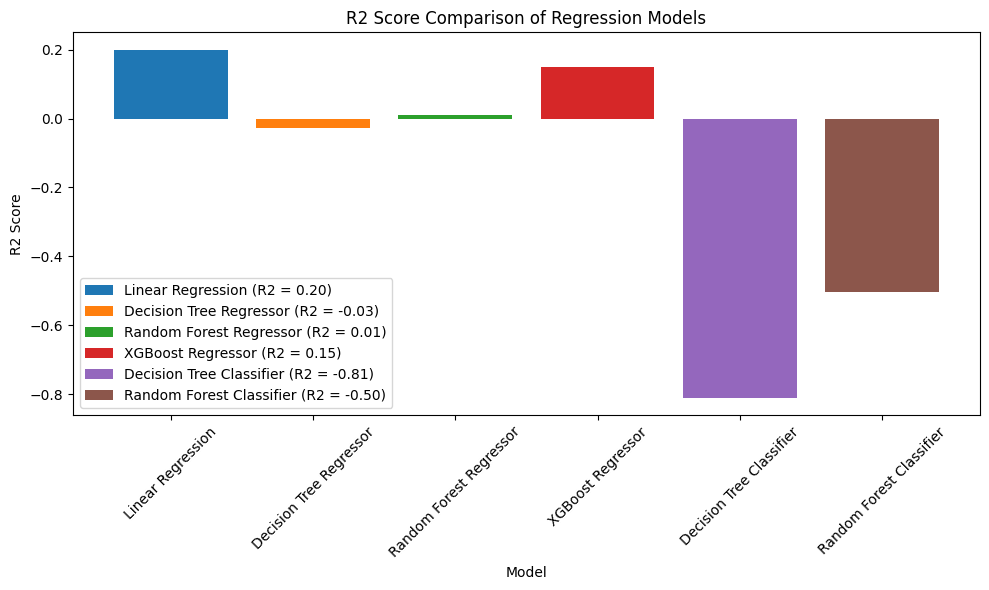

In [318]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

# Assuming `best_params` contains the best hyperparameters for each model
# And `models` contains the model instances
valid_models = []

# Train the models with the best parameters and evaluate
for name, model in models.items():
    try:
        if name not in best_params:
            print(f"Skipping {name} (no best parameters found).")
            continue  # Skip models that didn't undergo hyperparameter tuning

        # Set the model with the best parameters
        model.set_params(**best_params[name])

        # If y_train is multi-dimensional, use MultiOutputRegressor for regression tasks
        if len(y_train.shape) > 1 and y_train.shape[1] > 1 and "regressor" in name.lower():
            model = MultiOutputRegressor(model)  # Wrap the model for multi-output regression

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Compute the evaluation metrics
        r2 = r2_score(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        mse = mean_squared_error(y_test, y_test_pred)
        rmse = mse ** 0.5  # RMSE is the square root of MSE

        # Store valid models with their performance metrics
        valid_models.append((name, r2, mae, mse, rmse))

    except Exception as e:
        print(f"Error with {name}: {e}")

# Print evaluation results
if not valid_models:
    print("No valid models remain.")
else:
    print("\n------------ Evaluation Results ------------")
    for name, r2, mae, mse, rmse in valid_models:
        print(f"\nModel: {name}")
        print(f"R2 Score: {r2:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    # Optionally, visualize R2 score comparison
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    for name, r2, mae, mse, rmse in valid_models:
        plt.bar(name, r2, label=f"{name} (R2 = {r2:.2f})")

    plt.xlabel("Model")
    plt.ylabel("R2 Score")
    plt.title("R2 Score Comparison of Regression Models")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [319]:
# Constructing the DataFrame for display
model_results = []
for name, r2, mae, mse, rmse in valid_models:
    model_results.append({
        "Model after tuning": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2_Score": r2
    })

# Create the DataFrame
results_df = pd.DataFrame(model_results)

In [320]:
results_df

,Model after tuning,MAE,MSE,RMSE,R2_Score
0,Linear Regression,10.764435,189.392836,13.762007,0.199711
1,Decision Tree Regressor,12.120793,242.843717,15.583444,-0.026239
2,Random Forest Regressor,11.924035,234.420859,15.310809,0.009814
3,XGBoost Regressor,11.055599,201.398376,14.191490,0.148975
4,Decision Tree Classifier,16.708333,428.425000,20.698430,-0.809714
5,Random Forest Classifier,15.256667,356.260000,18.874851,-0.503680


In [321]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Track valid models that support probability predictions
valid_models = []

# ✅ Ensure only trained classification models are used
for name, model in models.items():
    if name not in classification_models:
        print(f"Skipping {name} (not a classification model).")
        continue  # Skip regression models

    # ✅ Skip models that don't support probability predictions
    if not hasattr(model, "predict_proba"):
        print(f"Skipping ROC AUC for {name} (no probability predictions).")
        continue  # Skip models like SVM with a linear kernel

    # ✅ Check if model has already been trained
    if not hasattr(model, "classes_"):
        print(f"Skipping {name} (model has not been trained).")
        continue  

    # Get probability scores for the positive class
    try:
        y_test_proba = model.predict_proba(X_test)

        # Ensure y_test_proba is a NumPy array (in case it's a list)
        y_test_proba = np.array(y_test_proba)

        if y_test_proba.ndim == 2:  # If it's a 2D array (probabilities for each class)
            y_test_proba = y_test_proba[:, 1]  # For binary classification, get the positive class probabilities
        else:
            print(f"Skipping {name} (unable to extract probabilities for binary classification).")
            continue

    except Exception as e:
        print(f"Error with {name}: {e}")
        continue

    # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_test_proba)

    # Store model name and results if valid
    valid_models.append((name, fpr, tpr, auc_score))

# ✅ If no valid models remain, print a message instead of plotting
if not valid_models:
    print("No results: All models are either untrained or not classification models.")
else:
    # Initialize ROC plot
    plt.figure()

    for name, fpr, tpr, auc_score in valid_models:
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

    # Custom settings for the plot
    plt.plot([0, 1], [0, 1], linestyle="--", color="grey")  # Baseline diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC AUC Curve")
    plt.legend()
    plt.show()


Skipping Linear Regression (not a classification model).
Skipping Ridge (not a classification model).
Skipping Lasso (not a classification model).
Skipping ElasticNet (not a classification model).
Skipping Decision Tree Regressor (not a classification model).
Skipping Random Forest Regressor (not a classification model).
Skipping Gradient Boosting Regressor (not a classification model).
Skipping AdaBoost Regressor (not a classification model).
Skipping XGBoost Regressor (not a classification model).
Skipping Support Vector Regressor (SVR) (not a classification model).
Skipping K-Nearest Neighbors Regressor (not a classification model).
Skipping Logistic Regression (model has not been trained).
Error with Decision Tree Classifier: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 200) + inhomogeneous part.
Error with Random Forest Classifier: setting an array element with a sequence. The requested arra

**✅ Fixed Code: ROC AUC After Hyperparameter Tuning**

In [322]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Track valid models that support probability predictions
valid_models = []

# ✅ Ensure only trained classification models are used
for name, model in models.items():
    if name not in classification_models:
        print(f"Skipping {name} (not a classification model).")
        continue  # Skip regression models

    # ✅ Apply best hyperparameters if available
    if name in best_params:
        model.set_params(**best_params[name])  # Apply best hyperparameters

    # ✅ Skip models that don't support probability predictions
    if not hasattr(model, "predict_proba"):
        print(f"Skipping ROC AUC for {name} (no probability predictions).")
        continue  # Skip models like SVM with a linear kernel

    # ✅ Ensure model has been trained before using it
    if not hasattr(model, "classes_"):
        print(f"Skipping {name} (model has not been trained).")
        continue  

    # Get predicted probabilities
    try:
        y_test_prob = model.predict_proba(X_test)

        # Ensure y_test_prob is a NumPy array (in case it's a list)
        y_test_prob = np.array(y_test_prob)

        # Handle multiclass classification
        if y_test_prob.ndim == 2:  # If it's a 2D array (probabilities for each class)
            if len(np.unique(y_train)) > 2:  # Multiclass classification
                lb = LabelBinarizer()
                lb.fit(np.unique(y_train))  # Fit label binarizer with classes from y_train

                # Transform y_test to match the order of y_train
                y_test_bin = lb.transform(y_test)

                # Compute ROC curve and AUC for each class
                n_classes = len(np.unique(y_train))
                fpr = dict()
                tpr = dict()
                roc_auc = dict()

                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
                    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_test_prob[:, i])

                # Compute micro-average ROC curve and AUC
                fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_test_prob.ravel())
                roc_auc["micro"] = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr', average='micro')

                # Store the results for multiclass
                valid_models.append((name, fpr, tpr, roc_auc))
            else:  # Binary classification
                y_test_proba = y_test_prob[:, 1]  # Get the positive class probabilities
                fpr, tpr, _ = roc_curve(y_test, y_test_proba)
                auc_score = roc_auc_score(y_test, y_test_proba)

                # Store the results for binary classification models
                valid_models.append((name, fpr, tpr, auc_score))

    except Exception as e:
        print(f"Error with {name}: {e}")
        continue

# ✅ If no valid models remain, print a message instead of plotting
if not valid_models:
    print("No results: All models are either untrained or not classification models.")
else:
    # Initialize ROC plot
    plt.figure()

    for name, fpr, tpr, auc_score in valid_models:
        if len(np.unique(y_train)) > 2:  # Multiclass
            # Plot ROC curve for each class
            for i in range(len(fpr)):
                plt.plot(fpr[i], tpr[i], label=f"{name} Class {i} (AUC = {roc_auc[i]:.2f})")
            # Plot micro-average ROC curve
            plt.plot(fpr["micro"], tpr["micro"], label=f"{name} Micro-average (AUC = {roc_auc['micro']:.2f})", color='navy', linestyle=':', linewidth=4)
        else:  # Binary classification
            plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

    # Custom settings for the plot
    plt.plot([0, 1], [0, 1], linestyle="--", color="grey")  # Baseline diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC AUC Curve")
    plt.legend()
    plt.show()


Skipping Linear Regression (not a classification model).
Skipping Ridge (not a classification model).
Skipping Lasso (not a classification model).
Skipping ElasticNet (not a classification model).
Skipping Decision Tree Regressor (not a classification model).
Skipping Random Forest Regressor (not a classification model).
Skipping Gradient Boosting Regressor (not a classification model).
Skipping AdaBoost Regressor (not a classification model).
Skipping XGBoost Regressor (not a classification model).
Skipping Support Vector Regressor (SVR) (not a classification model).
Skipping K-Nearest Neighbors Regressor (not a classification model).
Skipping Logistic Regression (model has not been trained).
Error with Decision Tree Classifier: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 200) + inhomogeneous part.
Error with Random Forest Classifier: setting an array element with a sequence. The requested arra